Data overview and dataset analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('../data/raw/insurance_claims.csv')

# Display basic info
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (1000, 40)


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [2]:
# Check numerical vs categorical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print(f"Numerical features: {len(numerical_cols)}")
print(f"Categorical features: {len(categorical_cols)}")
print(f"\nNumerical columns:\n{list(numerical_cols)}")
print(f"\nCategorical columns:\n{list(categorical_cols)}")

Numerical features: 19
Categorical features: 21

Numerical columns:
['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year', '_c39']

Categorical columns:
['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


Class Distribution:
Class      Count      Percentage
------------------------------
N          753        75.30%
Y          247        24.70%


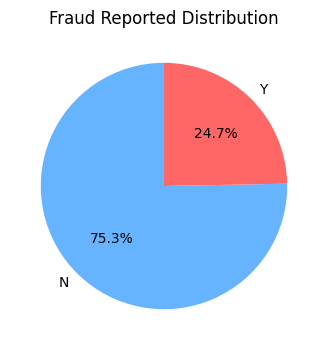

In [4]:
# Class distribution (fraud_reported)
class_counts = df['fraud_reported'].value_counts()
class_percentages = df['fraud_reported'].value_counts(normalize=True) * 100

print("Class Distribution:")
print(f"{'Class':<10} {'Count':<10} {'Percentage':<10}")
print("-" * 30)
for cls in class_counts.index:
    print(f"{cls:<10} {class_counts[cls]:<10} {class_percentages[cls]:.2f}%")

# Visualize
plt.figure(figsize=(6, 4))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff6666'])
plt.title('Fraud Reported Distribution')
plt.show()

In [5]:
# Check for missing values
missing_counts = df.isnull().sum()
missing_percentages = (df.isnull().sum() / len(df)) * 100

# Create a dataframe with missing value info
missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage': missing_percentages
})

# Filter to show only features with missing values
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Percentage', ascending=False)

if len(missing_df) > 0:
    print(f"Features with missing values: {len(missing_df)}")
    print("\n" + "=" * 50)
    print(missing_df.to_string())
else:
    print("No missing values found in the dataset!")

# Also check for '?' which might represent missing values
print("\n" + "=" * 50)
print("\nChecking for '?' values (potential missing values):")
for col in df.select_dtypes(include=['object']).columns:
    question_marks = (df[col] == '?').sum()
    if question_marks > 0:
        pct = (question_marks / len(df)) * 100
        print(f"{col}: {question_marks} ({pct:.2f}%)")

Features with missing values: 2

                       Missing Count  Missing Percentage
_c39                            1000               100.0
authorities_contacted             91                 9.1


Checking for '?' values (potential missing values):
collision_type: 178 (17.80%)
property_damage: 360 (36.00%)
police_report_available: 343 (34.30%)


In [ ]:
cols_with_question = ['collision_type', 'property_damage', 'police_report_available']

print("Fraud rate analysis for '?' values vs known values:\n")
for col in cols_with_question:
    print(f"=== {col} ===")
    
    question_mask = df[col] == '?'
    fraud_rate_question = (df[question_mask]['fraud_reported'] == 'Y').mean() * 100
    fraud_rate_known = (df[~question_mask]['fraud_reported'] == 'Y').mean() * 100
    
    print(f"  Fraud rate when '?': {fraud_rate_question:.2f}% (n={question_mask.sum()})")
    print(f"  Fraud rate when known: {fraud_rate_known:.2f}% (n={(~question_mask).sum()})")
    print(f"  Difference: {fraud_rate_question - fraud_rate_known:+.2f}%\n")

Fraud rate analysis for '?' values vs known values:

=== collision_type ===
  Fraud rate when '?': 8.99% (n=178)
  Fraud rate when known: 28.10% (n=822)
  Difference: -19.11%

=== property_damage ===
  Fraud rate when '?': 28.61% (n=360)
  Fraud rate when known: 22.50% (n=640)
  Difference: +6.11%

=== police_report_available ===
  Fraud rate when '?': 25.95% (n=343)
  Fraud rate when known: 24.05% (n=657)
  Difference: +1.90%



In [8]:
# Analyze authorities_contacted missing values
print("=== authorities_contacted analysis ===\n")

# Value distribution
print("Value distribution:")
print(df['authorities_contacted'].value_counts(dropna=False))

# Fraud rate by value
print("\n\nFraud rate by authorities_contacted:")
for val in df['authorities_contacted'].unique():
    if pd.isna(val):
        mask = df['authorities_contacted'].isna()
        label = "NaN (missing)"
    else:
        mask = df['authorities_contacted'] == val
        label = val
    fraud_rate = (df[mask]['fraud_reported'] == 'Y').mean() * 100
    count = mask.sum()
    print(f"  {label}: {fraud_rate:.2f}% fraud (n={count})")

=== authorities_contacted analysis ===

Value distribution:
authorities_contacted
Police       292
Fire         223
Other        198
Ambulance    196
NaN           91
Name: count, dtype: int64


Fraud rate by authorities_contacted:
  Police: 20.89% fraud (n=292)
  NaN (missing): 6.59% fraud (n=91)
  Fire: 26.91% fraud (n=223)
  Other: 31.82% fraud (n=198)
  Ambulance: 29.08% fraud (n=196)


In [9]:
# Check for outliers using IQR method
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Exclude _c39 (empty column) and identifier columns
cols_to_check = [col for col in numerical_cols if col not in ['_c39', 'policy_number', 'insured_zip']]

print("Outlier Analysis (IQR Method)\n" + "=" * 60)
print(f"{'Feature':<30} {'Outliers':<10} {'Percentage':<12} {'Min':<15} {'Max':<15}")
print("-" * 82)

outlier_summary = []
for col in cols_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_pct = (outlier_count / len(df)) * 100
    
    if outlier_count > 0:
        outlier_summary.append({
            'feature': col,
            'count': outlier_count,
            'pct': outlier_pct,
            'min': df[col].min(),
            'max': df[col].max()
        })
        print(f"{col:<30} {outlier_count:<10} {outlier_pct:.2f}%{'':<6} {df[col].min():<15} {df[col].max():<15}")

print(f"\nFeatures with outliers: {len(outlier_summary)} out of {len(cols_to_check)}")

Outlier Analysis (IQR Method)
Feature                        Outliers   Percentage   Min             Max            
----------------------------------------------------------------------------------
age                            4          0.40%       19              64             
policy_annual_premium          9          0.90%       433.33          2047.59        
umbrella_limit                 202        20.20%       -1000000        10000000       
total_claim_amount             1          0.10%       100             114920         
property_claim                 6          0.60%       0               23670          

Features with outliers: 5 out of 16


=== umbrella_limit Analysis ===

Value distribution:
umbrella_limit
-1000000       1
 0           798
 2000000       3
 3000000      12
 4000000      39
 5000000      46
 6000000      57
 7000000      29
 8000000       8
 9000000       5
 10000000      2
Name: count, dtype: int64

Negative values: 1 (0.10%)


Fraud rate by umbrella_limit:
    -1,000,000: 0.00% fraud (n=1)
             0: 23.43% fraud (n=798)
     2,000,000: 66.67% fraud (n=3)
     3,000,000: 16.67% fraud (n=12)
     4,000,000: 33.33% fraud (n=39)
     5,000,000: 32.61% fraud (n=46)
     6,000,000: 22.81% fraud (n=57)
     7,000,000: 31.03% fraud (n=29)
     8,000,000: 37.50% fraud (n=8)
     9,000,000: 40.00% fraud (n=5)
    10,000,000: 50.00% fraud (n=2)


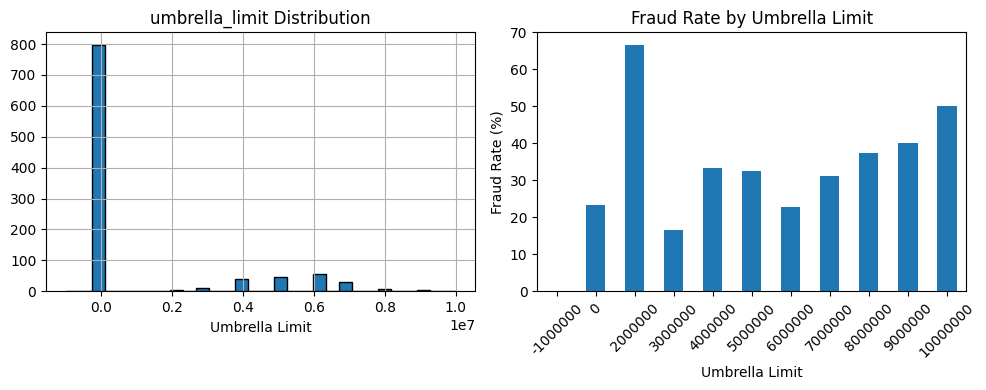

In [10]:
# Investigate umbrella_limit in detail
print("=== umbrella_limit Analysis ===\n")

# Value distribution
print("Value distribution:")
print(df['umbrella_limit'].value_counts().sort_index())

# Check negative values
neg_mask = df['umbrella_limit'] < 0
print(f"\nNegative values: {neg_mask.sum()} ({(neg_mask.sum()/len(df))*100:.2f}%)")

# Fraud rate by umbrella_limit value
print("\n\nFraud rate by umbrella_limit:")
for val in sorted(df['umbrella_limit'].unique()):
    mask = df['umbrella_limit'] == val
    fraud_rate = (df[mask]['fraud_reported'] == 'Y').mean() * 100
    count = mask.sum()
    print(f"  {val:>12,}: {fraud_rate:.2f}% fraud (n={count})")

# Visualize
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
df['umbrella_limit'].hist(bins=30, edgecolor='black')
plt.title('umbrella_limit Distribution')
plt.xlabel('Umbrella Limit')

plt.subplot(1, 2, 2)
fraud_by_umbrella = df.groupby('umbrella_limit')['fraud_reported'].apply(lambda x: (x == 'Y').mean() * 100)
fraud_by_umbrella.plot(kind='bar')
plt.title('Fraud Rate by Umbrella Limit')
plt.xlabel('Umbrella Limit')
plt.ylabel('Fraud Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()